In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from datetime import datetime

import os
import joblib
import pandas as pd

def print_scores(search):
    print(f"Score:\t{round(search.best_score_, 3)*100}\n\nParamters:\t{search.best_estimator_[1]}")

In [ ]:
mlr_path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'models',
    'genre_classification',
    'multinomial_logistic_regression',
    'grid_search_results_2021-11-29_multinomial_logistic_regression.pkl')

rf_path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'models',
    'genre_classification',
    'random_forest',
    'grid_search_results_2021-11-29_random_forest.pkl')

svm_path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'models',
    'genre_classification',
    'support_vector_machine',
    'grid_search_results_2021-12-04_support_vector_machine.pkl')

rf_search = joblib.load(rf_path)
mlr_search = joblib.load(mlr_path)
svm_search = joblib.load(svm_path)

In [ ]:
print_scores(rf_search)

Score:	47.099999999999994

Paramters:	RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300)


In [ ]:
print_scores(mlr_search)

Score:	42.8

Paramters:	LogisticRegression(C=10, multi_class='multinomial', penalty='l1', solver='saga')


In [ ]:
print_scores(svm_search)

Score:	44.6

Paramters:	SVC(C=1, gamma='auto')


In [ ]:
rf_df = pd.DataFrame(rf_search.cv_results_)
mlr_df = pd.DataFrame(mlr_search.cv_results_)

<AxesSubplot:xlabel='param_rf__n_estimators'>

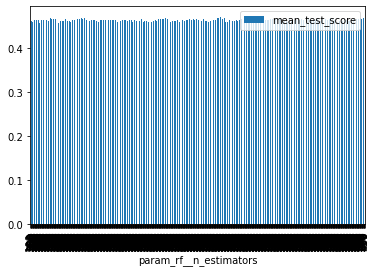

In [ ]:
rf_df.plot(x='param_rf__n_estimators', y='mean_test_score', kind='bar')

In [ ]:
rf_df.groupby(by='param_rf__n_estimators').mean_test_score.mean().reset_index()

,param_rf__n_estimators,mean_test_score
0,100,0.462742
1,150,0.463421
2,200,0.463755
3,250,0.464185
4,300,0.464202
5,350,0.464292
6,400,0.464292
7,450,0.464497
